In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-dataset/Electric_Vehicle_Population_Data.csv


Load libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data from source
data = pd.read_csv('/kaggle/input/electric-vehicle-dataset/Electric_Vehicle_Population_Data.csv')
df = data.copy()
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [4]:
df.shape

(223995, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [6]:
#Check missing values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [7]:
df['Legislative District'].dropna().shape

(223521,)

In [8]:
df.dropna()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4JJXP66P,Kitsap,Poulsbo,WA,98370.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,23.0,258127145,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
1,1G1FX6S08K,Snohomish,Lake Stevens,WA,98258.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,44.0,4735426,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
2,WBY1Z2C58F,King,Seattle,WA,98116.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81.0,0.0,34.0,272697666,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1V24F,Yakima,Selah,WA,98942.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,15.0,258112970,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223990,7SAYGDEE4R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,2.0,264662359,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
223991,WBY8P2C00M,Snohomish,Lake Stevens,WA,98258.0,2021,BMW,I3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,157728168,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
223992,JN1AZ0CP3B,Pierce,University Place,WA,98466.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73.0,0.0,28.0,261733433,POINT (-122.53756 47.23165),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
223993,5YJ3E1EA2R,Pierce,Puyallup,WA,98374.0,2024,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,25.0,275283487,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10


In [9]:
df = df.drop(columns=['Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'VIN (1-10)'])

In [10]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,223992.0,9.817649e+04,2.544241e+03,1.731000e+03,9.805200e+04,9.812600e+04,9.837400e+04,9.957700e+04
Model Year,223995.0,2.021264e+03,2.989676e+00,1.999000e+03,2.020000e+03,2.022000e+03,2.023000e+03,2.025000e+03
Electric Range,223977.0,4.773619e+01,8.498714e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,3.370000e+02
2020 Census Tract,223992.0,5.297997e+10,1.531491e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.602100e+10


In [12]:
df[['Model', 'Electric Range', '2020 Census Tract']].describe().T

,count,mean,std,min,25%,50%,75%,max
Electric Range,223977.0,4.773619e+01,8.498714e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,3.370000e+02
2020 Census Tract,223992.0,5.297997e+10,1.531491e+09,1.001020e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.602100e+10


In [13]:
df[['County', 'Make', 'Model', 'Electric Vehicle Type']].describe().T

,count,unique,top,freq
County,223992,207,King,113169
Make,223995,46,TESLA,96180
Model,223995,164,MODEL Y,46583
Electric Vehicle Type,223995,2,Battery Electric Vehicle (BEV),177151


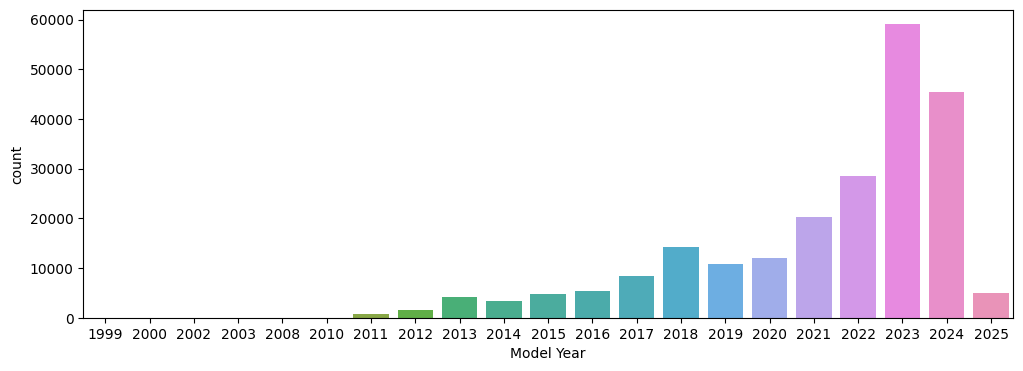

In [14]:
# Let's plot the relation for variable model year
plt.figure(figsize=(12,4))
sns.countplot(x='Model Year', data=df)
plt.show()

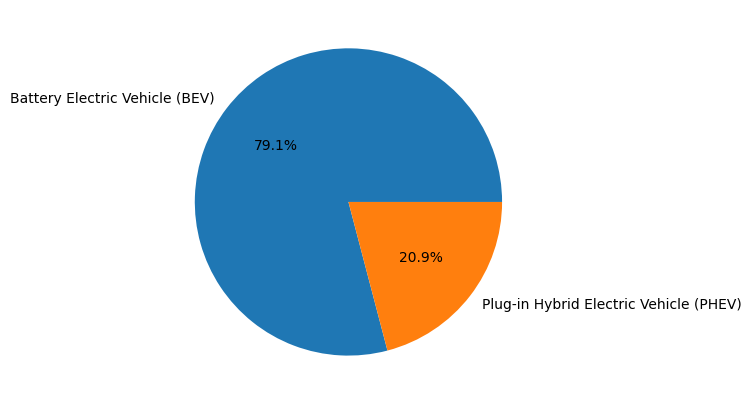

In [15]:
# Let's check the proportion of fully and hybrid electric vehicles
df['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [16]:
# Let's check Electric Vehicles by company
ev_company = df['Make'].value_counts().reset_index()
company_data = ev_company.style.background_gradient(cmap='CMRmap_r')
display(company_data)

,Make,count
0,TESLA,96180
1,CHEVROLET,16405
2,NISSAN,15259
3,FORD,11930
4,KIA,10760
5,BMW,9171
6,TOYOTA,8956
7,HYUNDAI,6878
8,RIVIAN,6236
9,JEEP,5773


In [17]:
# Count the number of Electric Vehicles registered in each County
# ev_per_year = EV_population_df.loc[(EV_population_df['Model Year'] == 2024)]
ev_per_county = df.groupby(['County']).size().reset_index(name="EV Count")

# Sort Counties by Electric Vehicle Count
ev_per_county = ev_per_county.sort_values(by='EV Count',ascending=False)

ev_per_county = ev_per_county.head(20)
ev_per_county                          

,County,EV Count
89,King,113169
174,Snohomish,27186
141,Pierce,18026
36,Clark,13452
187,Thurston,8252
91,Kitsap,7476
177,Spokane,6294
200,Whatcom,5447
16,Benton,2892
172,Skagit,2523


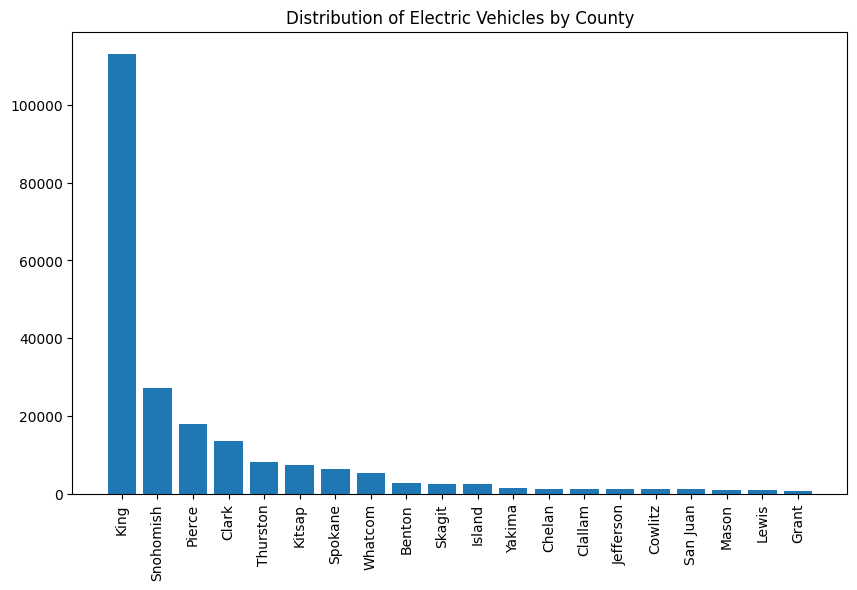

In [18]:
# Plot the distribution of electric vehicles by County
plt.figure(figsize=(10,6))
plt.bar(ev_per_county['County'], ev_per_county['EV Count'])
plt.title("Distribution of Electric Vehicles by County")
plt.xticks(rotation=90)
plt.show()

Distribution of Electic Vehicle Types

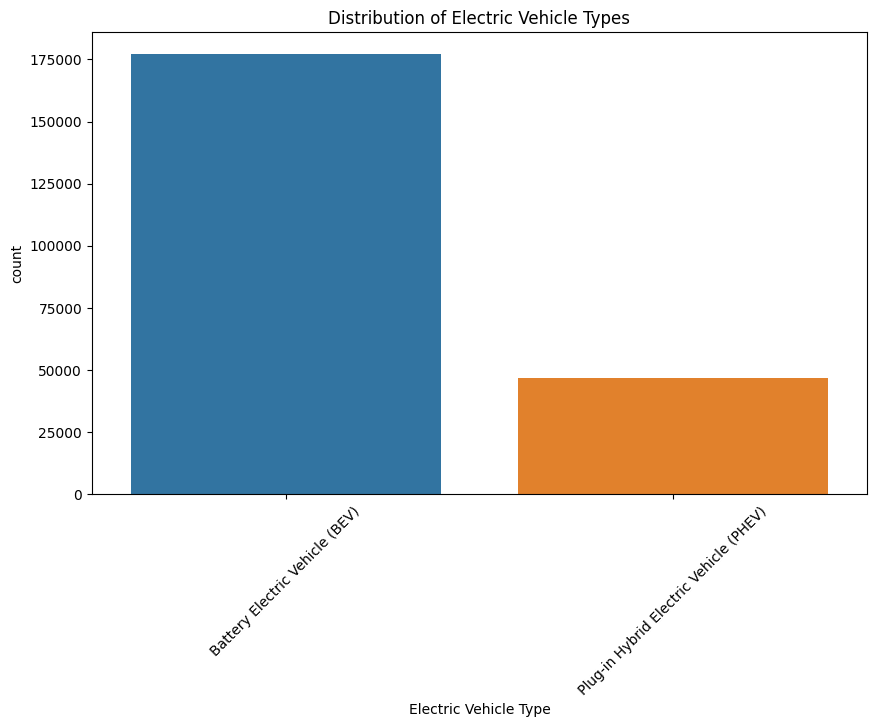

In [19]:
# Plot the distribution of electric vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

In [20]:
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            177151
Plug-in Hybrid Electric Vehicle (PHEV)     46844
Name: count, dtype: int64

Distribution of Electric Vehicles Over Time

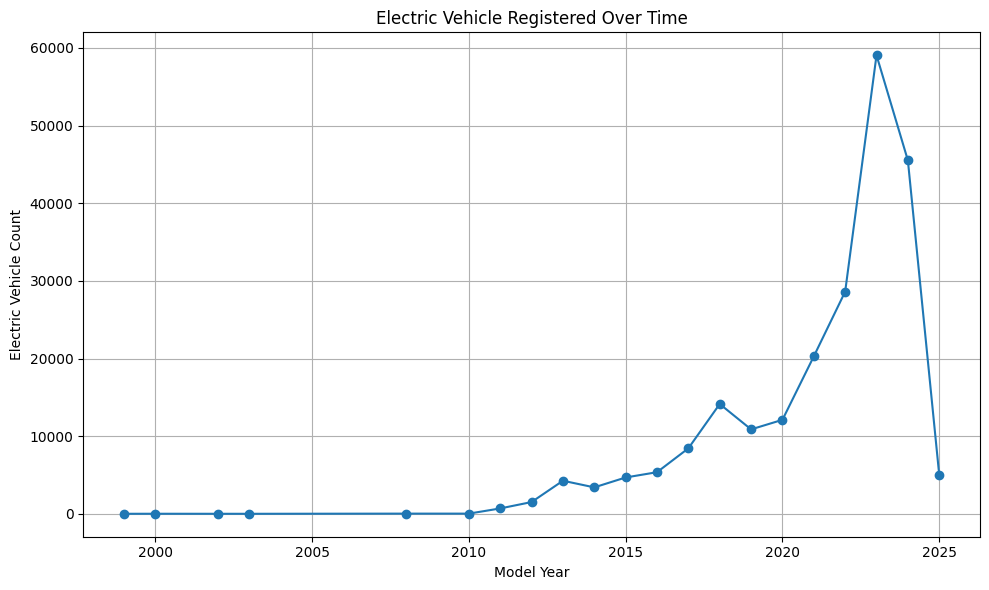

In [21]:
# Plot the graph to show number of electric vehicles registered per year
yearly_variations = df.groupby('Model Year').size().reset_index(name='Electric Vehicle Count')

# Plot the trends in electric vehicle manufacturing over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_variations['Model Year'], yearly_variations['Electric Vehicle Count'], marker='o')
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Count')
plt.title('Electric Vehicle Registered Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

Electric Range Distribution

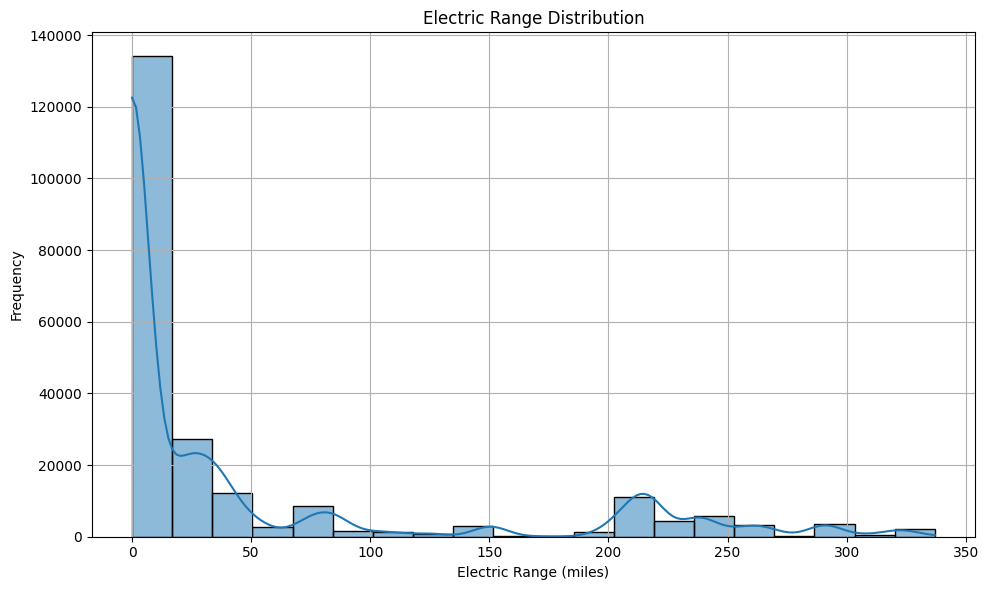

In [22]:
# Plot a histogram to visualize the distribution of electric range values
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.title('Electric Range Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

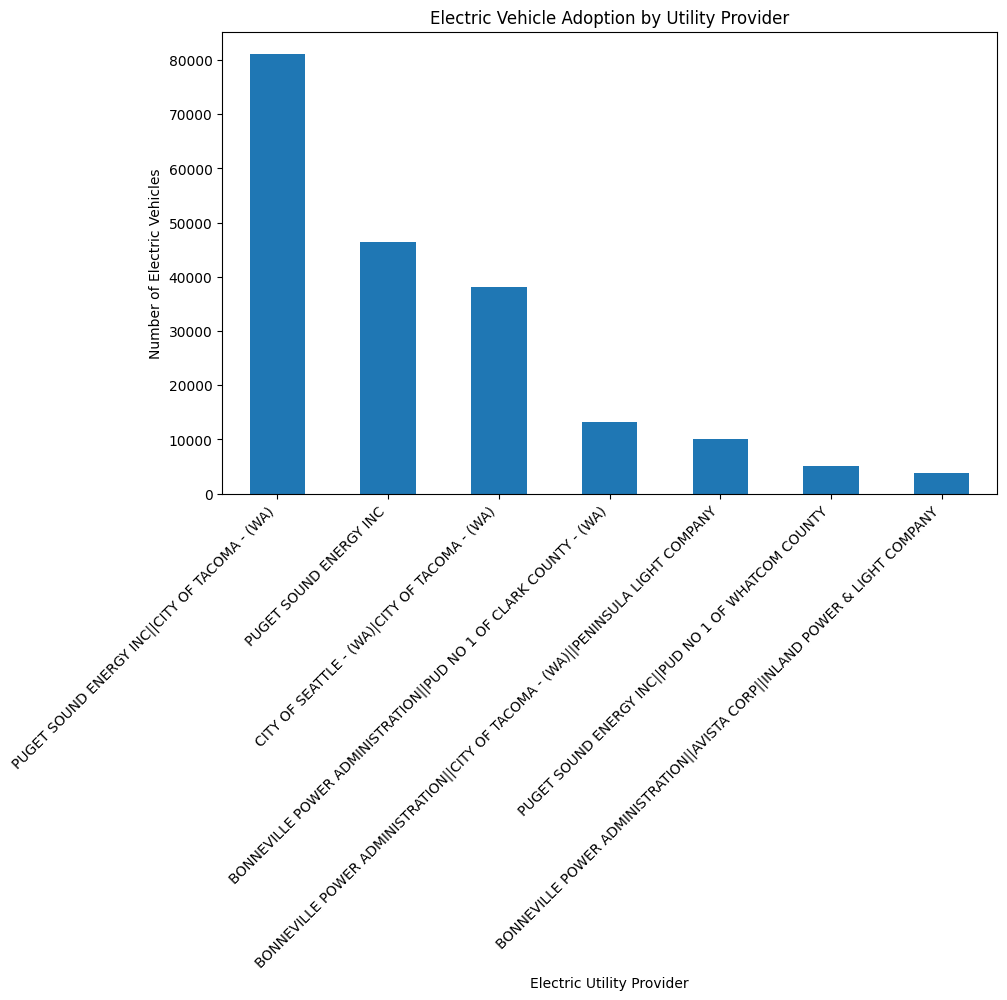

In [23]:
electric_utility_counts = df['Electric Utility'].value_counts().head(7)
# Plot a bar chart to visualize the distribution of electric vehicles by utility providers
plt.figure(figsize=(10, 6))
electric_utility_counts.plot(kind='bar')
plt.xlabel('Electric Utility Provider')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicle Adoption by Utility Provider')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
electric_utility_counts=df['Electric Utility'].value_counts().reset_index().head(20)
electric_utility_counts.style.background_gradient(cmap="CMRmap_r")

,Electric Utility,count
0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),81177
1,PUGET SOUND ENERGY INC,46325
2,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),38196
3,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),13130
4,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY,10077
5,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,5146
6,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY,3821
7,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY,2003
8,PACIFICORP,1838
9,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY,1689


### Conclusions:

Observations:
* 'King' County has the highest number of electric vehicles.
* 'Tesla' is the most popular electric car in the state.
*  Over the time in the year '2023' registered electric vehicles count is high.
*  Use of BEV (fully electric vehicles) incresed over time than PHEV (plug-in hybrid electric vehicle).
*  Tesla is the top choice for customers until now.
*  'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)' is top Electric Utility in the state.

Recommendations:
* Is buying Electric vehicle also depends on the household income? YES! We can also analyzed the house hold income in the county for Washington state to analyze the relation between Household income and the Electric Vehicle Population.
